In [ ]:
import pandas as pd
%pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE


In [ ]:
# importing the data set needed
train_set = pd.read_csv('/train.csv')

In [ ]:
# displaying the features along with the sums of NULL cells in each
train_null = train_set.isna().sum()
print(train_null.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# creates a dataframe
train_null = pd.DataFrame(train_null)
print(train_null)
# store the NUll information into train_null
train_null['dtypes'] = train_set.dtypes
print(train_null)
cat_columns = []

                 0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
...            ...
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0

[81 rows x 1 columns]
                 0   dtypes
Id               0    int64
MSSubClass       0    int64
MSZoning         0   object
LotFrontage    259  float64
LotArea          0    int64
...            ...      ...
MoSold           0    int64
YrSold           0    int64
SaleType         0   object
SaleCondition    0   object
SalePrice        0    int64

[81 rows x 2 columns]


In [ ]:
#This converts our categorical fields into dummy indicators.
#The fields have alot of NaN values as Nan indicates the absence of a specific feature.
#EG: NaN in the BasementType field shows that the house has no basement.

cat_columns = []
for i in range(len(train_null)):
  # iteratoring through rows of the train_null
    if train_null.iloc[i, 1].name == 'object' :
      #appends the index name of the object type to see categorical features
        cat_columns.append(train_null.index[i])
# converting category variables to numerical values of 0 and 1
new_train_set = pd.get_dummies(train_set, columns=cat_columns)

In [ ]:
#As we see this took care of the null values for these categorical columns

In [ ]:
y = new_train_set.isnull().sum()
print(y.to_string())
median_lot = new_train_set['LotFrontage'].median()
# assigned the empty cells of LotFrontage with median of this variable
new_train_set['LotFrontage']= new_train_set['LotFrontage'].fillna(median_lot)
# assigned the empty cells of MasVnrArea with median of this variable
median_mas = new_train_set['MasVnrArea'].median()
new_train_set['MasVnrArea'] = new_train_set['MasVnrArea'].fillna(median_mas)
# assigned the empty cells of year with none, as none indicates that the observation has no garage
new_train_set['GarageYrBlt'] = new_train_set['GarageYrBlt'].fillna('None')
# convert categorical variables into binary columns for each category
new_train_set = pd.get_dummies(new_train_set, columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])
print(new_train_set.dtypes.to_string())

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal       

In [ ]:
# In summary, this code extracts numeric columns from a DataFrame
#removes one specific column ('Id') as it is an indentifier field
# and then standardizes the numeric data in the selected columns to have a mean of 0 and a standard deviation of 1.
num_columns = []
for i in new_train_set.columns:
  if new_train_set.loc[:,i].dtypes.name != 'object' and new_train_set.loc[:,i].dtypes.name !=  'uint8':
    num_columns.append(i)
print(num_columns)
num_columns.remove('Id')
normalize_train_set = new_train_set.loc[:,num_columns]
normalize_train_set = (normalize_train_set - normalize_train_set.mean())/normalize_train_set.std()

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']


<Axes: >

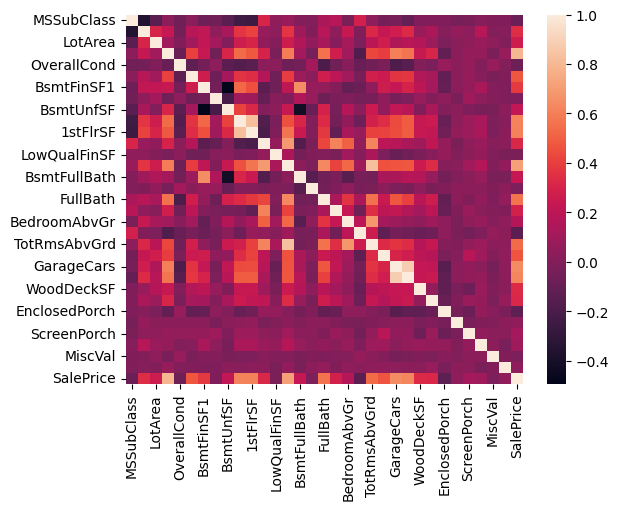

In [ ]:
# This code computes and visualizes the correlation between all numeric columns in the DataFrame to show in heatmap format.
normalize_train_set.corr()
sns.heatmap(normalize_train_set.corr())

In [ ]:
sns.pairplot(normalize_train_set) #We will also plot a correlation plot in sns scatterplot format for the features.

<Axes: xlabel='SalePrice', ylabel='Count'>

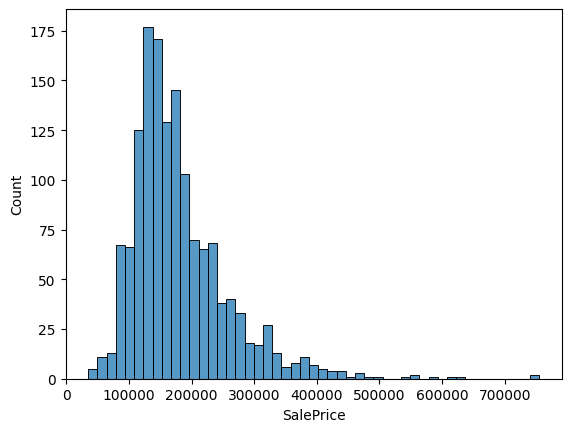

In [ ]:
sns.histplot(new_train_set, x="SalePrice")
#We shall look at the distribution of our Y variable. Which is the Sale Price of the house.

In [ ]:
print(new_train_set.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageYrBlt_2007.0', 'GarageYrBlt_2008.0', 'GarageYrBlt_2009.0',
       'GarageYrBlt_2010.0', 'GarageYrBlt_None', 'YrSold_2006', 'YrSold_2007',
       'YrSold_2008', 'YrSold_2009', 'YrSold_2010'],
      dtype='object', length=562)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# store the target variable salesPrice from new_train_set
Y_set = new_train_set['SalePrice']
# store features from the set excluding columns ID, salePrice, and MSSubClass as ID and MSSubClass are identifier fields
X_set = new_train_set.loc[:, ~new_train_set.columns.isin(['Id', 'SalePrice', 'MSSubClass'])]
# spliting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size=0.2,random_state=101)


In [ ]:
# creating a feature selection model using RFE using Linear Regression estimator
##Recursive Feature Elimination is an algorithm by sklearn that fits a model, and iteratively eliminates the feature with the lowest importance in the model
#Until the model reaches the specified number of features
model = RFE(LinearRegression(), n_features_to_select=10, step=1)

In [ ]:
#We shall fit the model based on training data
model.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [ ]:
rfe_columns = []
for i in model.support_.nonzero(): #Iterates through the indices of the columns that are non zero, and was selected as the final 10 variables in the RFE
  print(X_train.columns[i]) #Prints the name of the column
  rfe_columns.append(X_train.columns[i]) #We shall use this appended list of selected columns later to plot a sns pairplot

Index(['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf'],
      dtype='object')


In [ ]:
#This will create a dataframe with the selected feature names and its coefficients
rfe_columns1 = pd.DataFrame({'Feature': rfe_columns[0], 'Coefficient': model.estimator_.coef_})
print(rfe_columns1) #These are the features that the model uses for prediction. These features are said to be the most important
print(model.estimator_.intercept_) #This will show our intercept value

            Feature   Coefficient
0      LotShape_IR1 -1.618912e+18
1      LotShape_IR2 -1.618912e+18
2      LotShape_IR3 -1.618912e+18
3      LotShape_Reg -1.618912e+18
4     LandSlope_Gtl -5.264451e+18
5     LandSlope_Mod -5.264451e+18
6     LandSlope_Sev -5.264451e+18
7  GarageFinish_Fin  1.282560e+05
8  GarageFinish_RFn  9.068800e+04
9  GarageFinish_Unf  3.302400e+04
6.883363484471465e+18


In [ ]:
# using the featurs assigned to x_test to predict the target variable
predictions = model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# calculating and printing the Mean absolute error, mean squared error, and root mean squared error
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 47246.47602739726
MSE: 4404154073.55137
RMSE: 66363.80092754912


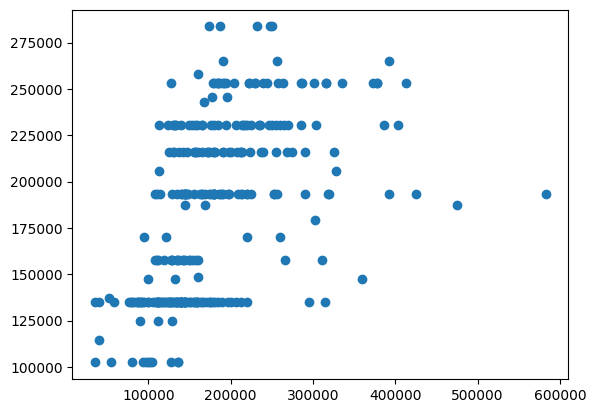

In [ ]:
plt.scatter(Y_test,predictions)